### Derivation of the ESG-Adjusted Return.

Let $y$ denote the return of a stock that has ESG intensity $x$. We can begin with a differential equation for $y(x)$:

$$\frac{dy}{dx} = -k \left(\frac{x}{\max\{X\}}\right)^n y$$ 

where:

$\left(\frac{x}{\max\{X\}}\right)^n$ is the decay factor governed by $n$, the rate of decay. We can solve the differential equation:

$$\frac{1}{y} \frac{dy}{dx} = -k \left(\frac{x}{\max\{X\}}\right)^n$$

$$\frac{1}{y} dy = -k \left(\frac{x}{\max\{X\}}\right)^n dx$$

$$\int \frac{1}{y} dy = -k \int \left(\frac{x}{\max\{X\}}\right)^n dx$$

Let $u = u = \frac{x}{\max\{X\}}, du = du = \frac{1}{\max\{X\}} dx, dx = dx = \max\{X\} du$ 

$$-k \int u^n \max\{X\} du = -k \max\{X\} \int u^n du$$

$$-k \max\{X\} \frac{u^{n+1}}{n+1} = -\frac{k \max\{X\}}{n+1} \left(\frac{x}{\max\{X\}}\right)^{n+1}$$

$$\ln |y| = -\frac{k}{(n+1) (\max\{X\})^n} x^{n+1} + C$$

Now we can solve for $y$. 

$$y = e^C \exp \left(-\frac{k}{(n+1) (\max\{X\})^n} x^{n+1}\right)$$

Let $e^C = C'$. Then, with initial condition $y(0) = r$:

$$y = C' \exp \left(-\frac{k}{(n+1) (\max\{X\})^n} x^{n+1}\right)$$

$$y = r \exp \left(-\frac{k}{(n+1) (\max\{X\})^n} x^{n+1}\right)$$

Now let $k = \frac{n+1}{n}$. Then,

$$\ln |y| = - \left(\frac{x}{\max\{X\}}\right)^n$$

$$ y = r \exp \left(- \left(\frac{x}{\max\{X\}}\right)^n \right)$$

Using the approximation $\exp(-u) \approx 1 - u$, assuming $x << \max\{X\}$

$$y = r \left(1 - \frac{x}{\max\{X\}}\right)^n$$

Putting this back in the form we are used to:$$\gamma_j = \left[\frac{\max_j{\lambda_j} -  \lambda_j}{\max_j{\lambda_j}}\right]^n r_j $$

### Add Standard Errors to Slope Calculations

In [172]:
import statsmodels.api as sm
from itertools import permutations

hashmap = {}
scopes = ['Scope {j}'.format(j=j) for j in range(1,4)]
scope_pairs = list(permutations(scopes, 2))
for x,y in scope_pairs:
    sub = df[(df[x].notnull()) & (df[y].notnull())]
    model = sm.OLS(sub[x],sub[y])
    results = model.fit()
    hashmap[x,y] = results.params.values[0], results.bse.values[0]
pd.DataFrame(hashmap, index=['SLOPE', 'SE']).T

SLOPE        SE
Scope 1 Scope 2   2.002060  0.551048
        Scope 3   0.106299  0.015121
Scope 2 Scope 1   0.065801  0.018111
        Scope 3   0.008277  0.003002
Scope 3 Scope 1   3.433109  0.488360
        Scope 2  10.726510  3.890953

### A ESG-Robust Portfolio

- $\gamma_i$: ESG-Weighted Return

- $z: = \{z: ||z||_{\infty} \leq 1 ||z||_1 \leq \Delta \}$: Uncertainty Set

- $[p_i - \delta_i, p_i + \delta_i]$: Box uncertainty

- $x_i$: Weight for stock $i$ (decision variable)

$$\begin{align}
\max~&\min\limits_{\pmb{z}\in\mathcal{Z}} \sum\limits_{i=1}^n\left(\gamma_i + \delta_iz_i \right)x_i \\
\text{s.t.}~&\sum\limits_{i=1}^nx_i = 1 \\
&x_i \geq 0, ~\forall i = 1, 2, ..., n,
\end{align}$$

0
Being solved by Gurobi...
Solution status: 2
Running time: 0.0008s
1
Being solved by Gurobi...
Solution status: 2
Running time: 0.0011s
2
Being solved by Gurobi...
Solution status: 2
Running time: 0.0011s
3
Being solved by Gurobi...
Solution status: 2
Running time: 0.0014s
4
Being solved by Gurobi...
Solution status: 2
Running time: 0.0012s
5
Being solved by Gurobi...
Solution status: 2
Running time: 0.0012s
6
Being solved by Gurobi...
Solution status: 2
Running time: 0.0013s
7
Being solved by Gurobi...
Solution status: 2
Running time: 0.0011s
8
Being solved by Gurobi...
Solution status: 2
Running time: 0.0010s
9
Being solved by Gurobi...
Solution status: 2
Running time: 0.0010s
10
Being solved by Gurobi...
Solution status: 2
Running time: 0.0012s


,CUMULATIVE,SHARPE,MIN
0,0.856885,1.737595,-0.130674
1,0.448165,1.265773,-0.120676
2,0.347398,1.055060,-0.116321
3,0.285330,0.918635,-0.112203
4,0.242752,0.818651,-0.111550
5,0.222900,0.765508,-0.113346
6,0.209792,0.731477,-0.113559
7,0.192466,0.687432,-0.112485
8,0.192466,0.687432,-0.112485
9,0.187542,0.674300,-0.112662


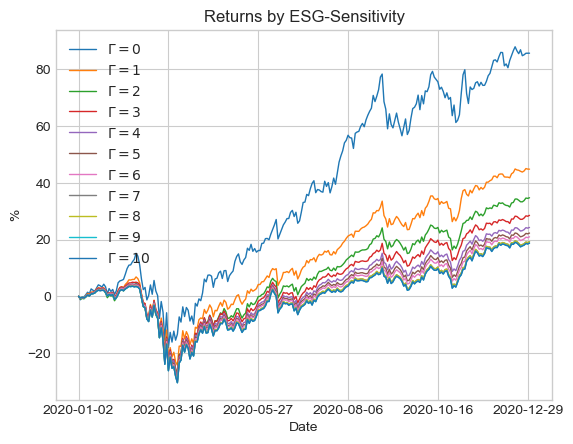

Above we can see that with a higher box-sensitivity, the % returns drop

### Sensitivity to Returns Penalization

$$\gamma_j = \left[\frac{\max_j{\lambda_j} -  \lambda_j}{\max_j{\lambda_j}}\right]^n r_j $$

with  $\Gamma = 1$. We can see that with larger $n$, the performance drops, and simultaneously, the intensity drops.

Being solved by Gurobi...
Solution status: 2
Running time: 0.0008s
Being solved by Gurobi...
Solution status: 2
Running time: 0.0008s
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Being solved by Gurobi...
Solution status: 2
Running time: 0.0008s
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Being solved by Gurobi...
Solution status: 2
Running time: 0.0010s
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Being solved by Gurobi...
Solution status: 2
Running time: 0.0010s


,CUMULATIVE,SHARPE,MIN,I(n),ESG_SHARPE_RATIO,ESG_CUM_RATIO
1,0.856885,1.737595,-0.130674,21498.490355,0.000000,0.000000
10,0.820790,1.689110,-0.129193,3337.314012,0.287826,0.287826
100,0.785698,1.647165,-0.135453,952.243880,0.333917,0.333917
1000,0.732584,1.540775,-0.139505,477.853905,0.365216,0.365216
10000,0.593315,1.353522,-0.142007,209.474008,0.421050,0.421050


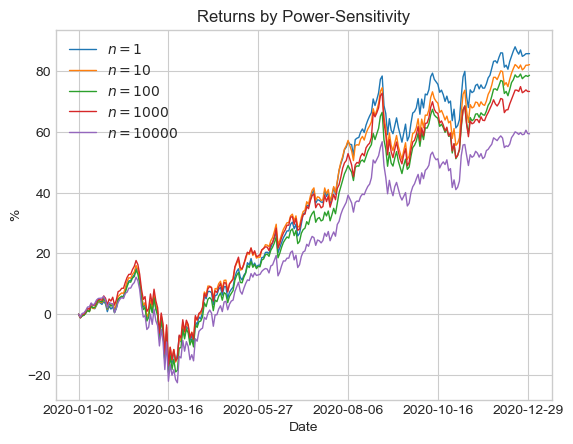

# Box Sensitivity ($\Gamma=1$)


<AxesSubplot:xlabel='LC2', ylabel='Proportion'>

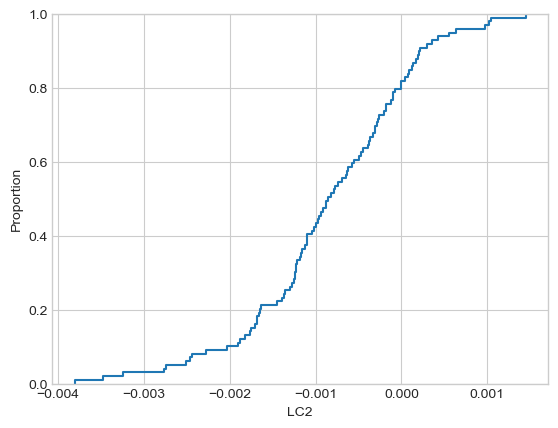

In [132]:
%matplotlib inline
sns.ecdfplot(primal.show().loc['LC2'].loc['x2':'x100'])